# 5- Sırt Regreyonu / Ridge Regression

## TEORİ

**Temel amaç, hata kareler toplamını minimize eden katsayıları sıfıra yaklaştırarak optimum hata değerini bulmaktır.**

Özellikleri:
* Çok değişkenli regresyon verilerini analiz etmede kullanılır,
* Aşırı öğrenmeye (over-fitting) karşı dirençli,
* Çok boyutluluğa çözüm sunar,
* Çok fazla gözlem olduğunda PLS'ye göre daha iyidir,
* Tüm değişkenler ile model kurar. İlgisiz değişkenleri modelden çıkarmaz, model katsayılarını **sıfıra yaklaştırır,**
* Lambda veya Alpha (ayar parametresi) kritik roldedir,
* Lamda veya Alpha için iyi bir değer bulunması önemlidir.

## UYGULAMA

### Verisetinin İncelenmesi ve Manipüle Edilmesi

* Kullanılan Kütüphaneler

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

* Verisetinin incelenmesi

Verisetini [buradan](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/Hitters.csv) indirebilirsiniz.

In [2]:
hit = pd.read_csv("https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/Hitters.csv")
df = hit.copy()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
df.isnull().values.any() # verisetinde bos degerler var mı?

True

In [4]:
df = df.dropna(axis = 0) # bos degerler olan satırları siler

In [5]:
df.info() # veriseti hakkında genel bilgi verir

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [6]:
df.describe().T # verisetinin istatistiksel dagılımı hakkında bilgi verir

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [7]:
df.corr() # verisetinin degiskenleri arasındaki korelasyon

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.963969,0.555102,0.899829,0.796015,0.624448,0.012725,0.207166,0.225341,0.212422,0.237278,0.221393,0.132926,0.309607,0.342117,0.325577,0.394771
Hits,0.963969,1.000000,0.530627,0.910630,0.788478,0.587311,0.018598,0.206678,0.235606,0.189364,0.238896,0.219384,0.122971,0.299688,0.303975,0.279876,0.438675
HmRun,0.555102,0.530627,1.000000,0.631076,0.849107,0.440454,0.113488,0.217464,0.217496,0.492526,0.258347,0.349858,0.227183,0.250931,-0.161602,-0.009743,0.343028
Runs,0.899829,0.910630,0.631076,1.000000,0.778692,0.697015,-0.011975,0.171811,0.191327,0.229701,0.237831,0.202335,0.163700,0.271160,0.179258,0.192609,0.419859
RBI,0.796015,0.788478,0.849107,0.778692,1.000000,0.569505,0.129668,0.278126,0.292137,0.442190,0.307226,0.387777,0.233619,0.312065,0.062902,0.150155,0.449457
Walks,0.624448,0.587311,0.440454,0.697015,0.569505,1.000000,0.134793,0.269450,0.270795,0.349582,0.332977,0.312697,0.429140,0.280855,0.102523,0.081937,0.443867
Years,0.012725,0.018598,0.113488,-0.011975,0.129668,0.134793,1.000000,0.915681,0.897844,0.722371,0.876649,0.863809,0.837524,-0.020019,-0.085118,-0.156512,0.400657
CAtBat,0.207166,0.206678,0.217464,0.171811,0.278126,0.269450,0.915681,1.000000,0.995057,0.801676,0.982747,0.950730,0.906712,0.053393,-0.007897,-0.070478,0.526135
CHits,0.225341,0.235606,0.217496,0.191327,0.292137,0.270795,0.897844,0.995057,1.000000,0.786652,0.984542,0.946797,0.890718,0.067348,-0.013144,-0.068036,0.548910
CHmRun,0.212422,0.189364,0.492526,0.229701,0.442190,0.349582,0.722371,0.801676,0.786652,1.000000,0.825625,0.927903,0.810878,0.093822,-0.188886,-0.165369,0.524931


In [8]:
# Verisetindeki kategorik degiskenleri sürekli degiskenlere cevirmek gerekir,
dummy = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dummy.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [9]:
# anaveriseti icerisindeki kategorik degiskenler silinmeli
df1 = df.drop(['League', 'Division', 'NewLeague'], axis = 1)
df1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [10]:
# dummy ve df1 verisetleri birlestirilerek güncel veriseti olusturulur,
df = pd.concat([df1, dummy[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


### Model Kurulumu

In [11]:
# %80 egitim, %20 test seti,
X = df.drop('Salary', axis = 1) # bagımsız degiskenler (salary haric)
y = df['Salary'] # bagımlı degisken

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.20,
                                                   random_state = 42)
# alpha degeri 1 icin model nesnesinin olusturulması ve fit edilmesi
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((210, 19), (53, 19), (210,), (53,))

In [13]:
ridge_model.intercept_ # sabit deger

16.45587435441962

In [14]:
ridge_model.coef_ # katsayılar

array([-1.47971291e+00,  7.42480150e+00,  4.78254119e+00, -2.85482179e+00,
       -1.44072298e+00,  5.55296246e+00,  8.04637196e+00, -2.30117250e-01,
        1.07797047e-01, -4.72336604e-01,  1.68775333e+00,  9.42540405e-01,
       -8.20270639e-01,  2.47961735e-01,  2.25838687e-01, -6.48471398e-01,
        1.06725456e+02, -1.13602563e+02, -6.25772773e+01])

In [15]:
rscore = ridge_model.score(X_train, y_train) # modelin anlamlılık degeri

In [16]:
rscore # [önemli]

0.590467709997941

In [17]:
10 ** np.linspace(10, -2, 100) * 0.5 # random alpha degerleri icin olusturulur.

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

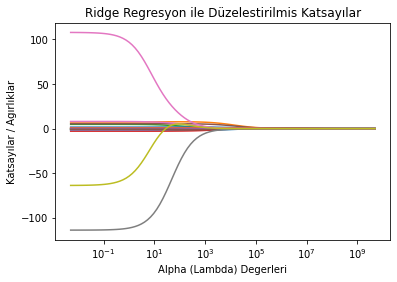

In [18]:
alphalar = 10 ** np.linspace(10, -2, 100) * 0.5

modelridge = Ridge()
katsayilar = []

for i in alphalar:
    modelridge.set_params(alpha = i)
    modelridge.fit(X_train, y_train)
    katsayilar.append(modelridge.coef_)
    
# Elde edilen degerlerin görsellestirilmesi,
ax = plt.gca()
ax.plot(alphalar, katsayilar)
ax.set_xscale('log')

plt.xlabel('Alpha (Lambda) Degerleri')
plt.ylabel('Katsayılar / Agırlıklar')
plt.title('Ridge Regresyon ile Düzelestirilmis Katsayılar');

* !! Katsayıları 0 yapmaz, 0'a yaklaştırır.

In [19]:
rscore2 = modelridge.score(X_train, y_train) # farklı alpha degerleri icin r-squared

In [20]:
rscore2 # [önemli]

0.5904682417421445

In [21]:
min(katsayilar[0]), min(katsayilar[1]), min(katsayilar[2]), min(katsayilar[3])

(-1.8244572546487718e-06,
 -2.4048419470001144e-06,
 -3.168402595790405e-06,
 -4.1726375650121374e-06)

* Görüldügü üzere katsayıları 0'a yaklasıyor

### Tahminleme

In [22]:
# ilk kurulan model üzerinden tahminleme, alpha = 0.1
y_pred = ridge_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [23]:
rmse # hata degeri [önemli]

358.1091251503649

In [24]:
# farklı alpha degerleri üzerinden tahminleme,
ypred2 = modelridge.predict(X_test)
rmse2 = np.sqrt(mean_squared_error(y_test, ypred2))

In [25]:
rmse2 # [önemli]

358.16504919917713

* Bu şekilde dogru degerlere ulasılmaz! Optimum alpha degerine ulasmak icin model tuning uygulanmalı

### Model Tuning / Model Doğrulama

In [26]:
alphalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [41]:
# optimum alpha degerinin bulunması
ridge_cv = RidgeCV(alphas = alphalar,
                  scoring = 'neg_mean_squared_error',
                  normalize = True)

In [42]:
ridge_cv.fit(X_train, y_train) # modeli fit etme

/home/mrkizmaz/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [43]:
ridge_cv.alpha_ # optimum alpha degeri

0.5748784976988678

In [45]:
# final modelinin olusturulması ve optimum test hatasının bulunması,
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, normalize = True)
model_final = ridge_tuned.fit(X_train, y_train)
ypred_final = model_final.predict(X_test)
rmse3 = np.sqrt(mean_squared_error(y_test, ypred_final))

/home/mrkizmaz/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [46]:
rmse3 # [önemli]

383.0073770592842

In [47]:
rscore3 = model_final.score(X_train, y_train)

In [48]:
rscore3 # [önemli]

0.5285010441463454

In [49]:
print("Alpha = 0.1 icin elde edilen degerler; \nModelin anlamlılık yüzdesi = {0}\nHata degeri = {1}".format(rscore * 100, rmse))
print("Coklu alpha degerleri icin elde edilen degerler; \nModelin anlamlılık yüzdesi = {0}\nHata degeri = {1}".format(rscore2 * 100, rmse2))
print("Optimum alpha degeri icin elde edilen degerler; \nModelin anlamlılık yüzdesi = {0}\nHata degeri = {1}".format(rscore3 * 100, rmse3))

Alpha = 0.1 icin elde edilen degerler; 
Modelin anlamlılık yüzdesi = 59.0467709997941
Hata degeri = 358.1091251503649
Coklu alpha degerleri icin elde edilen degerler; 
Modelin anlamlılık yüzdesi = 59.04682417421445
Hata degeri = 358.16504919917713
Optimum alpha degeri icin elde edilen degerler; 
Modelin anlamlılık yüzdesi = 52.85010441463454
Hata degeri = 383.0073770592842


## SONUÇ

* Alpha = 0.1 icin elde edilen degerler; 
    * Modelin anlamlılık yüzdesi = 59.0467709997941
    * Hata degeri = **358.1091251503649**
* Coklu alpha degerleri icin elde edilen degerler; 
    * Modelin anlamlılık yüzdesi = 59.04682417421445
    * Hata degeri = **358.16504919917713**
* Optimum alpha degeri icin elde edilen degerler; 
    * Modelin anlamlılık yüzdesi = 52.85010441463454
    * Hata degeri = **383.0073770592842**

* Aynı veriseti üzerinde,
    * PCR regresyon modelinde optimum hata degeri: **333.6546715301251** olarak bulundu.
    * PLC regresyon modelinde optimum hata degeri: **333.60890630848354** olarak bulundu.